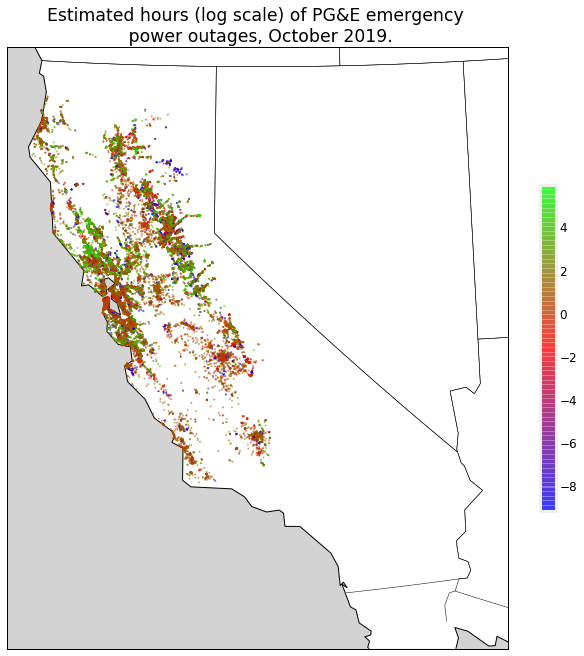

In [157]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

outages = pd.read_csv('outages_expanded.csv')

# Convert data to datetime and filter for October 2019
outages.earliest = [dt.datetime.fromtimestamp(x) for x in outages.earliest]
outages = outages[(outages.earliest >= '10/1/2019') & (outages.earliest < '11/1/2019')]

# Setup figure.
fig = plt.figure(figsize=(10,20))
ax = fig.add_subplot()
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 12})

# Create basemap centered on California.
m = Basemap(width=1000000,height=1200000,projection='lcc',
            resolution='l',
            lat_1=min(outages.latitude),
            lat_2=max(outages.latitude),
            lat_0=(min(outages.latitude) -2 + max(outages.latitude)) / 2,
            lon_0=-119.)

# Draw basemap.
m.drawcoastlines()
m.drawmapboundary(fill_color='lightgrey')
m.fillcontinents(color='white',lake_color='lightgrey')
m.drawstates()
m.drawcountries()

# Prepare and draw outages by estimated duration.
lons, lats = m([float(x) for x in outages.longitude],
               [float(y) for y in outages.latitude])

scatter = m.scatter(lons, lats,
          cmap= "brg", 
          s=2.,
          c=np.log(outages.possible_duration_hours + 0.0001),
          alpha=.5,
          zorder=5)
plt.colorbar(scatter, shrink=0.3)
plt.title("Estimated hours (log scale) of PG&E emergency \n power outages, October 2019.")
plt.show()

